## Regularization

This is the process of penalizing the weights to avoid overfitting due to the introduction of complex basis functions (Polynomial, Gaussian). 

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

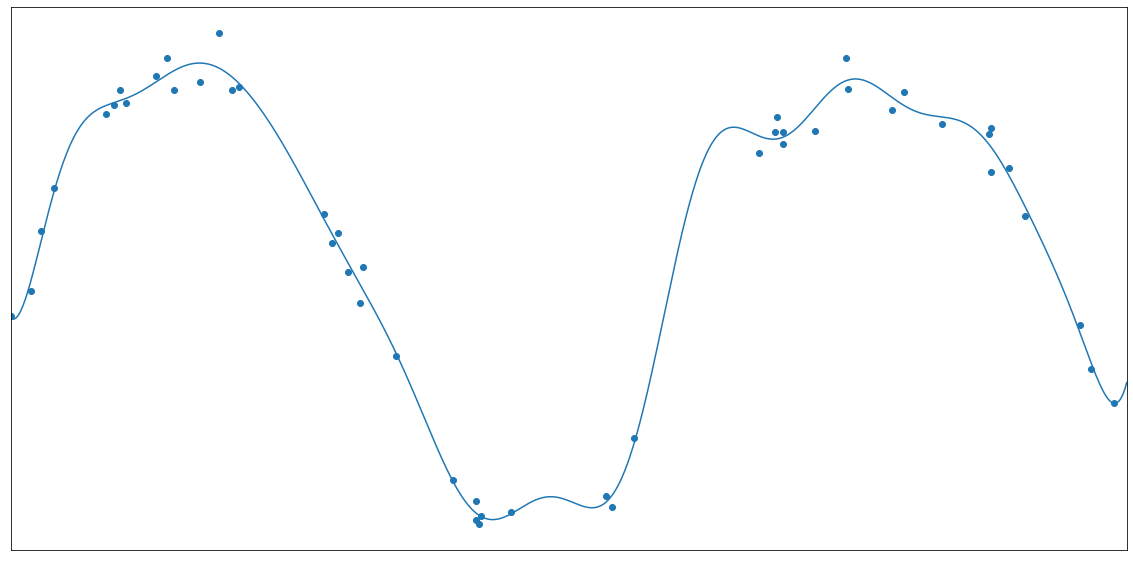

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(20,10))
plt.xticks([]); plt.yticks([])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

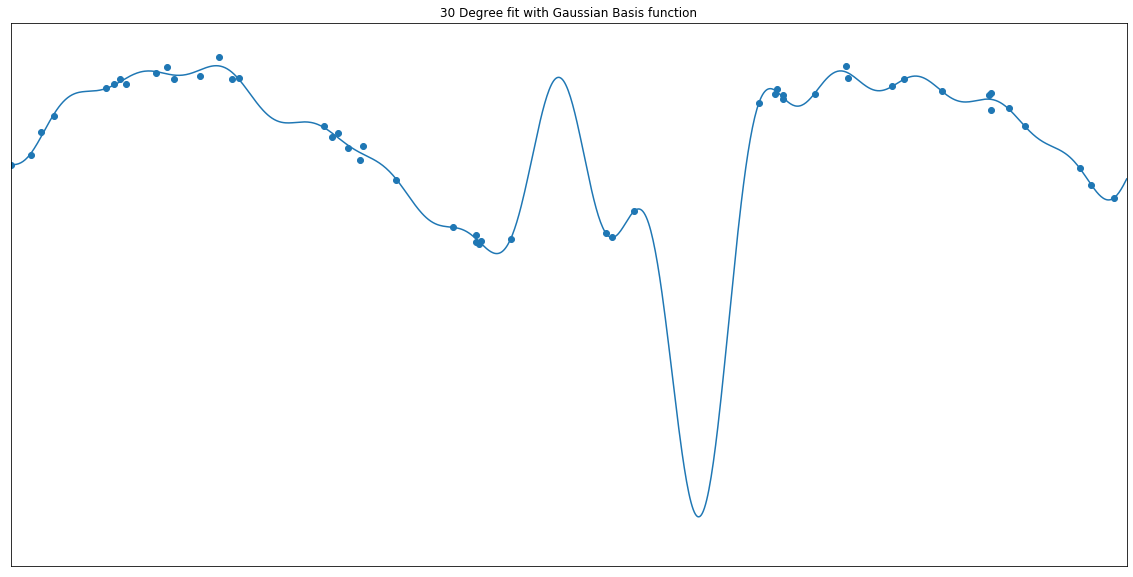

In [3]:
# Consider the fit with 30 degree Gaussian Fit
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.figure(figsize=(20,10))
plt.xticks([]); plt.yticks([])
plt.title('30 Degree fit with Gaussian Basis function')
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-4.5, 1.5);

Consider the below cell that executes the plot of the basis function coefficients. The plot is the coefficents wrt the basis function location.

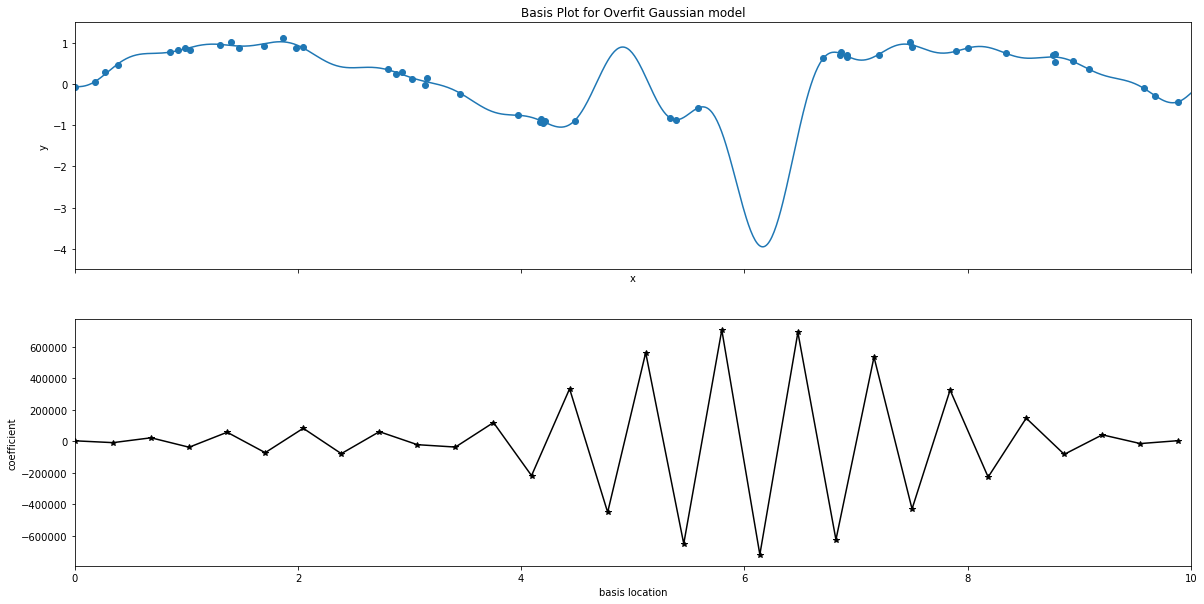

In [4]:
def basis_plot(model, title='Basis Plot for Overfit Gaussian model'):
    fig, ax = plt.subplots(2, sharex=True, figsize=(20,10))
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-4.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_, marker='*', color='k')
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The coefficients of the adjacent basis functions cancels each other out and this will cancel each other out. Regularization is the process of penalizing the weights to cancel the spikes. There are several forms of Regularization in which the most common ones are:
<br>
- Ridge Regression ($L2$ Regularization or Tikhonov Regularization)
<br>
This is done using the following penalty parameter ($P = \alpha\sum_{n=1}^{N}\theta_{n}^{2}$)

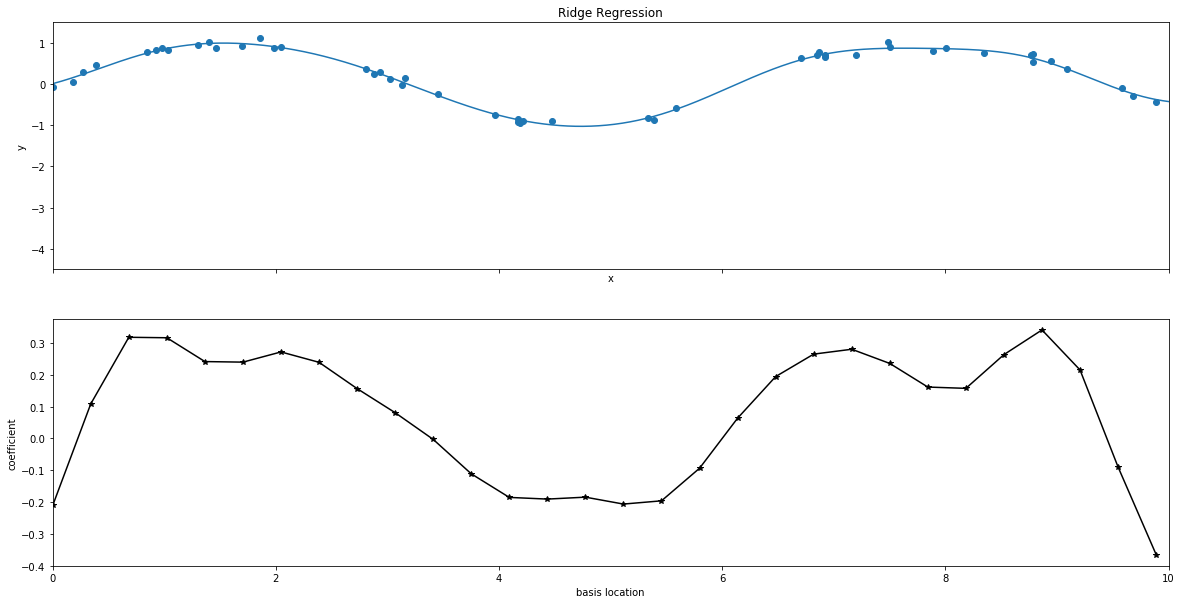

In [5]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The advantage of the $\alpha$ parameter is that it can be adjusted with no more computational cost to get the best result. When $\alpha\rightarrow0$ we get the standard overfitting line result. When $\alpha\rightarrow\infty$ we get the best supressed result that is possible. The $\alpha$ parameter can be found using cross validation.

- Lasso Regression ($L1$ Regularization)
<br>
Here the penalty term ($P$) is the absolute sum of the regression coefficients.
<br>
$P = \alpha\sum_{n=1}^{N}|\theta_{n}|$
<br>
Geometrically Lasso Regression favors the models that are sparse whenever possible. This means it sets the model weights to zero whenever possible.

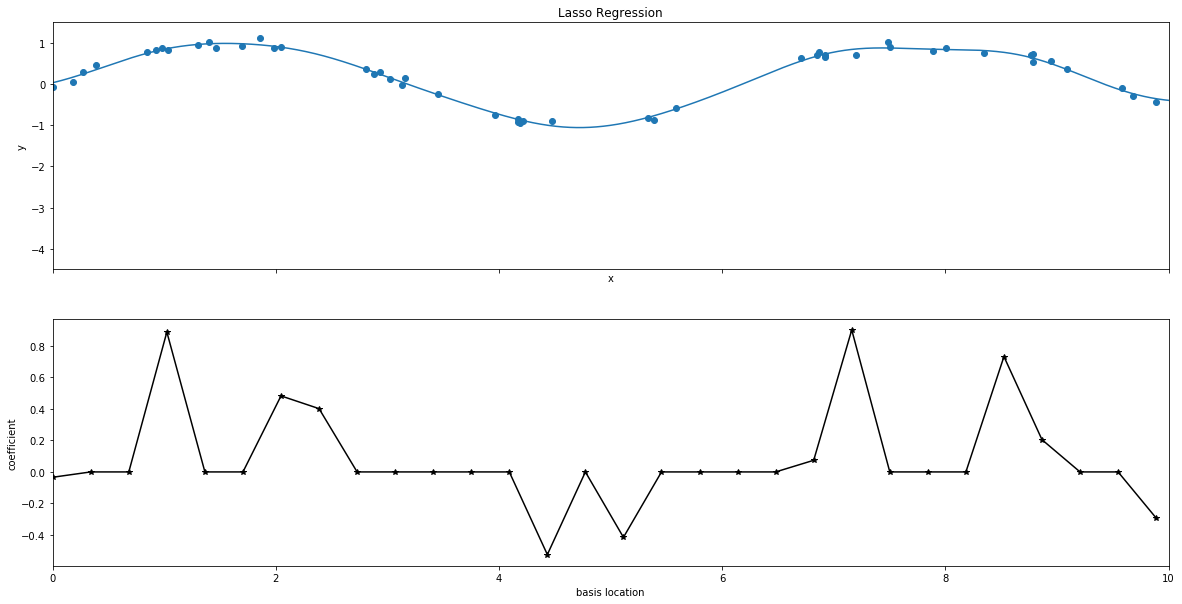

In [6]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=2000))
basis_plot(model, title='Lasso Regression')